### Working with Shapefile in Geopandas
 Laura Roman, October 5, 2018

Installs - Run in Terminal:

In [ ]:
#conda config --add channels conda-forge
#conda install geopandas
#conda install rtree
#conda install pyshp
#conda install pyproj
#conda install geopy
#conda install descartes

In [1]:
#!pip install pysal

In [9]:
import pysal as ps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
#change cell width
from IPython.core.display import display, HTML
#plot sizes
plt.rcParams['figure.figsize']=10,10

In [15]:
import geopandas as gpd
#Import shape file of the counties in Texas
shp_file = ('./shapedata/2010/tl_2010_48_county10/tl_2010_48_county10.shp')

#Read in shape file to geopandas
c2010 = gpd.read_file(shp_file)

In [46]:
#View asGeopandas DataFrame
c2010.tail()

,STATEFP10,COUNTYFP10,COUNTYNS10,GEOID10,NAME10,NAMELSAD10,LSAD10,CLASSFP10,MTFCC10,CSAFP10,CBSAFP10,METDIVFP10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
249,48,297,01383934,48297,Live Oak,Live Oak County,06,H1,G4020,None,None,None,A,2692800935,101483813,+28.3515349,-098.1269608,"POLYGON ((-98.33434699999999 28.266147, -98.33..."
250,48,345,01383958,48345,Motley,Motley County,06,H1,G4020,None,None,None,A,2562954830,642801,+34.0583832,-100.7936960,"POLYGON ((-101.041592 33.969059, -101.041437 3..."
251,48,421,01383996,48421,Sherman,Sherman County,06,H1,G4020,None,None,None,A,2390650564,428754,+36.2776278,-101.8947164,"POLYGON ((-101.914834 36.500475, -101.914687 3..."
252,48,357,01383964,48357,Ochiltree,Ochiltree County,06,H1,G4020,None,None,None,A,2376642415,1331778,+36.2787442,-100.8158636,"POLYGON ((-100.84828 36.057408, -100.848306 36..."
253,48,091,01383831,48091,Comal,Comal County,06,H1,G4020,None,41700,None,A,1449037063,39890210,+29.8030193,-098.2552006,"POLYGON ((-98.35020799999999 29.728748, -98.35..."


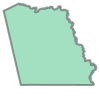

In [17]:
#Take a look at geometry columns
c2010['geometry'][48]

In [47]:
from shapely.geometry import mapping
g = [i for i in c2010.geometry]
all_coords = mapping(g[0])["coordinates"]
all_coords[0][0:10]

((-96.52998699999999, 32.545282),
 (-96.53329599999999, 32.545299),
 (-96.54674399999999, 32.545353999999996),
 (-96.553062, 32.545386),
 (-96.560311, 32.545443),
 (-96.56652199999999, 32.545525999999995),
 (-96.566716, 32.545529),
 (-96.573951, 32.545547),
 (-96.578103, 32.545595),
 (-96.582882, 32.545564))

In [48]:
len(all_coords[0])

1767

In [49]:
c2010.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 18 columns):
STATEFP10     254 non-null object
COUNTYFP10    254 non-null object
COUNTYNS10    254 non-null object
GEOID10       254 non-null object
NAME10        254 non-null object
NAMELSAD10    254 non-null object
LSAD10        254 non-null object
CLASSFP10     254 non-null object
MTFCC10       254 non-null object
CSAFP10       55 non-null object
CBSAFP10      124 non-null object
METDIVFP10    12 non-null object
FUNCSTAT10    254 non-null object
ALAND10       254 non-null int64
AWATER10      254 non-null int64
INTPTLAT10    254 non-null object
INTPTLON10    254 non-null object
geometry      254 non-null object
dtypes: int64(2), object(16)
memory usage: 35.8+ KB


In [50]:
import descartes
from descartes.patch import PolygonPatch

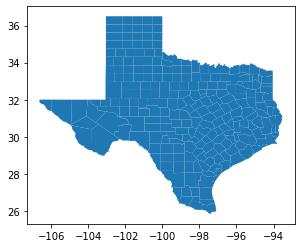

In [51]:
c2010['geometry'].plot()

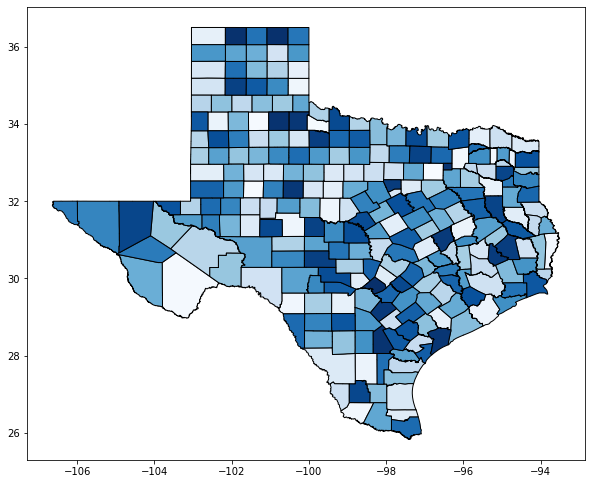

In [52]:
c2010['geometry'].plot(edgecolor="k",figsize=(10,10),cmap="Blues")

## Subset to 9 Counties in Houston MSA

In [56]:
c2010['NAME10'][0:15]

0            Dallas
1            Howard
2             Foard
3             Floyd
4          Brewster
5          Franklin
6              Hunt
7            Newton
8             Starr
9            Kinney
10    Collingsworth
11        Tom Green
12          Coleman
13         Brazoria
14             Leon
Name: NAME10, dtype: object

### Create List of 9 counties

In [57]:
stat_area = ['Harris County',
             'Fort Bend County',
             'Montgomery County',
             'Brazoria County',
             'Galveston County',
             'Liberty County',
             'Waller County',
             'Chambers County',
             'Austin County']

In [58]:
houston_lat = 29.7604
houston_long = -95.3698

In [59]:
c2010_H = c2010[c2010['NAMELSAD10'].isin(stat_area)]

In [60]:
c2010_H

,STATEFP10,COUNTYFP10,COUNTYNS10,GEOID10,NAME10,NAMELSAD10,LSAD10,CLASSFP10,MTFCC10,CSAFP10,CBSAFP10,METDIVFP10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
13,48,039,01383805,48039,Brazoria,Brazoria County,06,H1,G4020,288,26420,None,A,3516429692,649792694,+29.1678175,-095.4346470,"POLYGON ((-95.057143 29.200881, -95.057092 29...."
52,48,201,01383886,48201,Harris,Harris County,06,H1,G4020,288,26420,None,A,4411986582,191671993,+29.8572730,-095.3930371,"POLYGON ((-95.31099399999999 30.032887, -95.31..."
64,48,339,01383955,48339,Montgomery,Montgomery County,06,H1,G4020,288,26420,None,A,2698080682,91022528,+30.3023644,-095.5035226,"POLYGON ((-95.596757 30.13446, -95.596778 30.1..."
113,48,291,01383931,48291,Liberty,Liberty County,06,H1,G4020,288,26420,None,A,3000284900,46411807,+30.1621885,-094.8226815,"POLYGON ((-94.84262099999999 30.487458, -94.84..."
144,48,473,01384022,48473,Waller,Waller County,06,H1,G4020,288,26420,None,A,1329777937,11365575,+30.0135781,-095.9821022,"POLYGON ((-95.950301 30.236905, -95.9489579999..."
160,48,167,01383869,48167,Galveston,Galveston County,06,H1,G4020,288,26420,None,A,979943275,1283210753,+29.2287059,-094.8948647,"POLYGON ((-95.11995499999999 29.29611, -95.125..."
188,48,071,01383821,48071,Chambers,Chambers County,06,H1,G4020,288,26420,None,A,1546578832,709774725,+29.7039331,-094.6688749,"POLYGON ((-94.930807 29.673759, -94.930773 29...."
202,48,015,01383793,48015,Austin,Austin County,06,H1,G4020,288,26420,None,A,1674448899,25577195,+29.8919013,-096.2701697,"POLYGON ((-96.199451 29.656455, -96.1996099999..."
221,48,157,01383864,48157,Fort Bend,Fort Bend County,06,H1,G4020,288,26420,None,A,2231225129,61796736,+29.5266017,-095.7710149,"POLYGON ((-96.01643799999999 29.627104, -96.01..."


In [61]:
#Sorted values so they would match up with the df with population stats
c2010_H = c2010_H.sort_values('NAME10')
c2010_H.NAME10

202        Austin
13       Brazoria
188      Chambers
221     Fort Bend
160     Galveston
52         Harris
113       Liberty
64     Montgomery
144        Waller
Name: NAME10, dtype: object

In [62]:
msa_stats = pd.read_csv('./data/msa_pop_and_density_update.csv')
msa_stats

,Unnamed: 0,Geographic area.1,dpop2000,dpop2010,dhouse2000,dhouse2010,pop2000,pop2010
0,8,Austin County,36.1,44.0,15.6,20.0,23590,28417
1,20,Brazoria County,174.4,230.7,65.4,87.2,241767,313166
2,36,Chambers County,43.4,58.8,17.2,22.3,26031,35096
3,79,Fort Bend County,405.3,679.5,132.6,228.7,354452,585375
4,84,Galveston County,627.8,769.9,280.4,350.2,250158,291309
5,101,Harris County,1967.0,2402.4,750.9,938.5,3400578,4092459
6,146,Liberty County,60.5,65.3,22.7,24.8,70154,75643
7,170,Montgomery County,281.4,437.5,108.0,170.5,293768,455746
8,237,Waller County,63.6,84.1,23.3,30.8,32663,43205


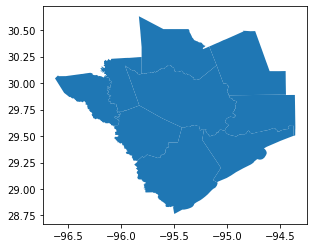

In [64]:
c2010_H['geometry'].plot();#cmap='viridis')#,alpha=0.6);#"Spectral_r")

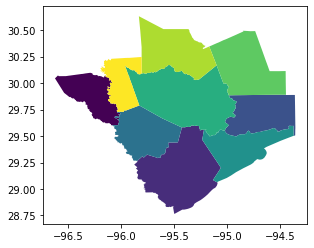

In [65]:
c2010_H['geometry'].plot(cmap='viridis');

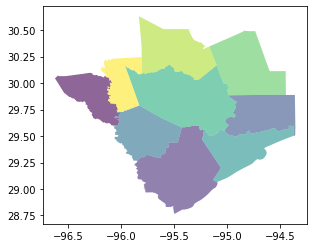

In [66]:
c2010_H['geometry'].plot(cmap='viridis',alpha=0.6)

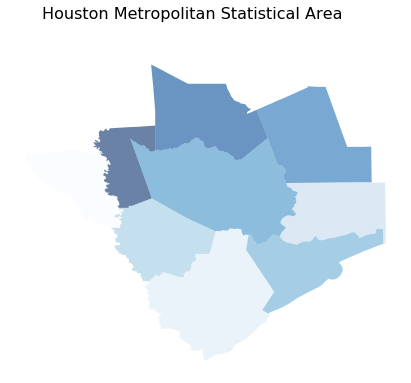

In [67]:
f, ax = plt.subplots(1, figsize=(15, 6))
ax = c2010_H['geometry'].plot(ax=ax,cmap='Blues',alpha=0.6)#,edgecolor='k',lw=2)
lims = plt.axis('off')#'off')#
f.suptitle('Houston Metropolitan Statistical Area',fontsize=16)
plt.show();

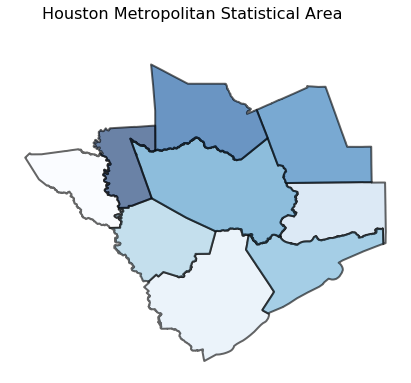

In [68]:
f, ax = plt.subplots(1, figsize=(15, 6))
ax = c2010_H['geometry'].plot(ax=ax,cmap='Blues',alpha=0.6,edgecolor='k',lw=2)
lims = plt.axis('off')#'off')#
f.suptitle('Houston Metropolitan Statistical Area',fontsize=16)
plt.show();

/Users/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:396: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


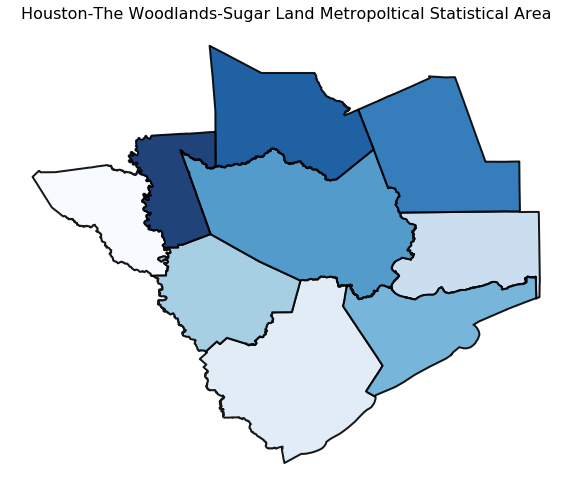

In [69]:
#kw = dict(column=msa_stats['dpop2010'], k=6, colormap='Blues',alpha=0.9,linewidth=2,edgecolor='k')
ax = c2010_H.plot(colormap='Blues',alpha=0.9,linewidth=2,edgecolor='k',figsize=(10,10));#scheme='QUANTILES', **kw)
lims = ax.axis('off')#'off')#;
plt.title("Houston-The Woodlands-Sugar Land Metropoltical Statistical Area",fontsize=16);


/Users/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


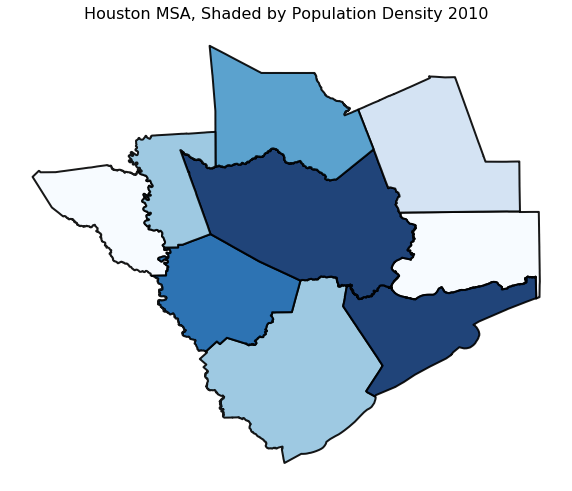

In [70]:
kw = dict(column=msa_stats['dpop2010'], k=6, cmap='Blues',alpha=0.9,linewidth=2,edgecolor='k',figsize=(10,10))
ax = c2010_H.plot(scheme='QUANTILES', **kw)
lims = ax.axis('off')#'off')#
plt.title("Houston MSA, Shaded by Population Density 2010",fontsize=16);

In [75]:
msa_stats['Geographic area.1'].to_list()

['Austin County',
 'Brazoria County',
 'Chambers County',
 'Fort Bend County',
 'Galveston County',
 'Harris County',
 'Liberty County',
 'Montgomery County',
 'Waller County']

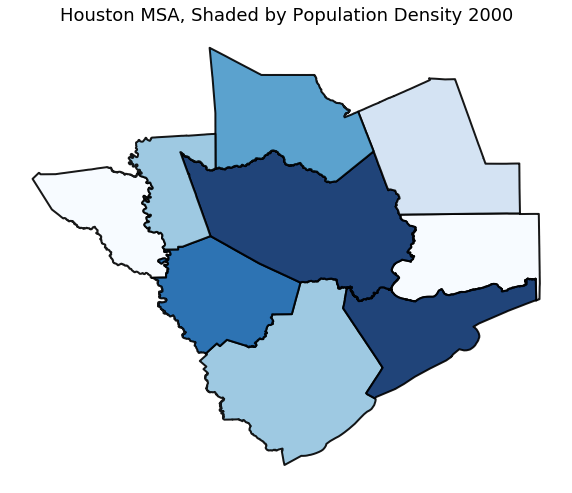

In [79]:
kw = dict(column=msa_stats['dpop2000'], k=6, cmap='Blues',alpha=0.9,linewidth=2,edgecolor='k',figsize=(10,10))
ax = c2010_H.plot(scheme='QUANTILES', **kw)
lims = ax.axis('off')#'off')#
ax.set_title("Houston MSA, Shaded by Population Density 2000",fontsize=18);
#https://stackoverflow.com/questions/38899190/geopandas-label-polygons
#ax.annotate(s=msa_stats['Geographic area.1'].to_list(), xy=coords, horizontal alignmnet ='center';